# BPT and WISE colors diagrams and classification of galaxies

In this notebook SDSS is querried twice to produse a BPT diagram and a WISE color diagram for a sample of galaxies in order to better uinderstand their classification. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.sdss import SDSS
plt.style.use('bmh')

In [2]:
query_bpt = """SELECT
s.plate,s.mjd, s.fiberid,
g.oiii_5007_flux AS '[OIII] 5007 flux',
g.oiii_5007_flux_err AS '[OIII] 5007 flux err',
g.h_beta_flux AS 'Hbeta flux',
g.h_beta_flux_err AS 'Hbeta flux err',
g.h_alpha_flux AS 'Halpha flux',
g.h_alpha_flux_err AS 'Halpha flux err',
g.nii_6584_flux AS '[NII] 6583 flux',
g.nii_6584_flux_err AS '[NII] 6583 flux err'

FROM SpecObj AS s
JOIN GalSpecLine AS g ON
s.specobjid = g.specobjid

WHERE
g.oiii_5007_flux > 5
AND g.h_beta_flux > 5
AND g.h_alpha_flux > 5
AND g.nii_6584_flux > 5
AND g.oiii_5007_eqw < 0
AND g.h_beta_eqw < 0
AND g.h_alpha_eqw < 0
AND g.nii_6584_eqw < 0
AND g.sigma_forbidden * 2.355 < 500
AND g.sigma_balmer * 2.355 < 500
AND g.h_beta_flux > 5 * g.h_beta_flux_err
AND g.h_alpha_flux > 5 * g.h_alpha_flux_err
AND g.oiii_5007_flux > 5 * g.oiii_5007_flux_err
AND g.nii_6584_flux > 5 * g.nii_6584_flux_err
AND s.class = 'GALAXY'
AND s.snmedian_g > 40"""

In [3]:
data_bpt = SDSS.query_sql(query_bpt).to_pandas()
data_bpt

,plate,mjd,fiberid,[OIII] 5007 flux,[OIII] 5007 flux err,Hbeta flux,Hbeta flux err,Halpha flux,Halpha flux err,[NII] 6583 flux,[NII] 6583 flux err
0,278,51900,469,6074.06200,54.657270,3250.79100,29.741710,10285.9400,80.752940,1743.3940,16.689570
1,280,51612,358,577.45530,9.778317,1254.60200,12.966280,4352.1960,30.378900,2210.9420,15.410410
2,280,51612,396,114.49210,8.387469,68.51180,8.140857,215.8928,11.843240,200.4113,11.115800
3,337,51997,284,1700.55300,29.299840,3136.07400,36.449470,11471.4300,108.196200,4230.6670,37.282390
4,336,51999,1,319.97590,13.510640,1358.30700,19.134120,4808.2210,42.743670,1715.9680,18.455830
...,...,...,...,...,...,...,...,...,...,...,...
953,2769,54527,535,110.62790,8.980727,53.06117,7.877617,148.1966,12.387060,253.2597,13.331970
954,2868,54451,493,95.08416,2.495764,167.69090,2.365611,1111.8340,6.541389,726.9317,4.925529
955,2970,54589,268,80.73515,6.528084,39.16608,5.987207,144.3445,9.226276,141.3919,8.549505
956,2970,54589,535,61.79113,6.547112,85.17157,6.343073,530.8751,11.500790,311.0701,10.228310


In the next cell the conditions from Kauffmann et al (2003) are applied to separate galaxies in SF dominated and AGN dominated. Afterwards, results are plotted alongside the empirical separation line. One outlier is not shown in the plots for a clearer view.

In [4]:
data_sf = data_bpt[np.log10(data_bpt['[OIII] 5007 flux'] / data_bpt['Hbeta flux']) < 0.61 / (np.log10(data_bpt['[NII] 6583 flux'] / data_bpt['Halpha flux']) - 0.05) + 1.3]
data_agn = data_bpt[np.log10(data_bpt['[OIII] 5007 flux'] / data_bpt['Hbeta flux']) > 0.61 / (np.log10(data_bpt['[NII] 6583 flux'] / data_bpt['Halpha flux']) - 0.05) + 1.3]

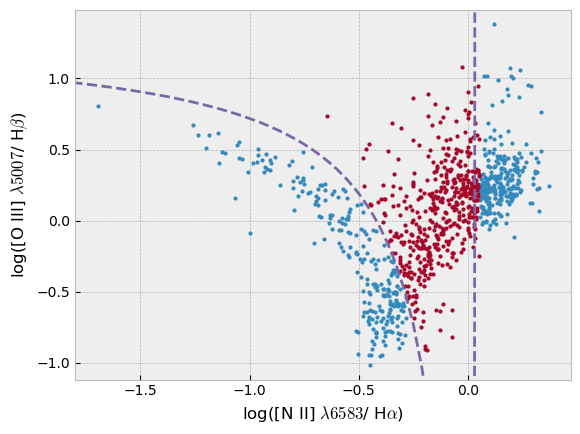

In [5]:
x_sf = np.log10(data_sf['[NII] 6583 flux'] / data_sf['Halpha flux'])
y_sf =np.log10(data_sf['[OIII] 5007 flux'] / data_sf['Hbeta flux'])

x_agn = np.log10(data_agn['[NII] 6583 flux'] / data_agn['Halpha flux'])
y_agn =np.log10(data_agn['[OIII] 5007 flux'] / data_agn['Hbeta flux'])

x_data = np.log10(data_bpt['[NII] 6583 flux'] / data_bpt['Halpha flux'])
y_data = np.log10(data_bpt['[OIII] 5007 flux'] / data_bpt['Hbeta flux'])

x_eq = np.linspace(np.min(x_data), np.max(x_data), 100)
y_empeq = 0.61 / (x_eq - 0.05) + 1.3

plt.plot(x_sf, y_sf, 'o', markersize=2)
plt.plot(x_agn, y_agn, 'o', markersize=2)
plt.plot(x_eq, y_empeq, '--')
plt.ylim(np.min(y_data)- 0.1, np.max(y_data) + 0.1)
plt.xlim(-1.8, np.max(x_data) + 0.1)                               #Not plotting an outlier because it's easier to read the plot like this. Outlier has Halpha flux > 27 000 000 and is to the extreme left on the plot
plt.xlabel(r'log([N II] $\lambda 6583$/ H$\alpha$)')
plt.ylabel(r'log([O III] $\lambda 5007$/ H$\beta$)')
plt.savefig('BPT_first_att.png', dpi = 300)
plt.show()

The analytic form of the line has a discontinuity at 0 because of the logs but we are interested in using only the left part as a separator as in the Kauffmann paper. 

In [6]:
data_agn_new = pd.concat([data_bpt[np.log10(data_bpt['[OIII] 5007 flux'] / data_bpt['Hbeta flux']) > 0.61 / (np.log10(data_bpt['[NII] 6583 flux'] / data_bpt['Halpha flux']) - 0.05) + 1.3],\
                      data_bpt[np.log10(data_bpt['[NII] 6583 flux'] / data_bpt['Halpha flux'])>0]])
data_sf_new = pd.concat([data_bpt, data_agn_new])
data_sf_new = data_sf_new.drop_duplicates(keep = False)

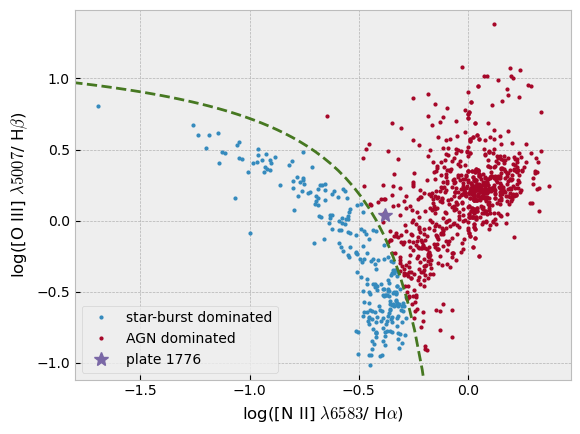

In [7]:
x_eq = np.linspace(np.min(x_data), 0, 100)
y_empeq = 0.61 / (x_eq - 0.05) + 1.3

x_sf_new = np.log10(data_sf_new['[NII] 6583 flux'] / data_sf_new['Halpha flux'])
y_sf_new =np.log10(data_sf_new['[OIII] 5007 flux'] / data_sf_new['Hbeta flux'])

x_agn_new = np.log10(data_agn_new['[NII] 6583 flux'] / data_agn_new['Halpha flux'])
y_agn_new =np.log10(data_agn_new['[OIII] 5007 flux'] / data_agn_new['Hbeta flux'])

plate_1776 = data_bpt.index[data_bpt['plate'] == 1776].to_list() 

plt.plot(x_sf_new, y_sf_new, 'o', markersize=2, label = 'star-burst dominated')
plt.plot(x_agn_new, y_agn_new, 'o', markersize=2, label = 'AGN dominated')
plt.plot(np.log10(data_bpt['[NII] 6583 flux'][plate_1776] / data_bpt['Halpha flux'][plate_1776]), np.log10(data_bpt['[OIII] 5007 flux'][plate_1776] / data_bpt['Hbeta flux'][plate_1776]),\
         '*', markersize = 10, label = 'plate 1776')
plt.plot(x_eq, y_empeq, '--')
plt.ylim(np.min(y_data)- 0.1, np.max(y_data) + 0.1)
plt.xlim(-1.8, np.max(x_data) + 0.1)  
plt.xlabel(r'log([N II] $\lambda 6583$/ H$\alpha$)')
plt.ylabel(r'log([O III] $\lambda 5007$/ H$\beta$)')
plt.legend()
plt.savefig('BPT_final.png', dpi = 300)
plt.show()

#print(data_sf_new)

Here we have the final plot where the AGN object with plate number 1776 is also marked with a star. I did the cross matchoing between the WISE and BPT tables manualy using the plate number of the object. That is faster to to for only 1 object but for multiple objects a smarter way would need to be implemented. When plotting the individual object at first I manually selected its index in the table but later realised that everytime the whole code is ran SDSS is queried and the specific object gets a different index so the variable plate_1776 nd later plate_1776_wise was added.

In [8]:
query = """SELECT
s.plate, s.mjd, s.fiberID,
w.w1mag AS 'W1 mag', 
w.w2mag AS 'W2 mag', 
w.w3mag AS 'W3 mag'

FROM SpecObj AS s
JOIN GalSpecLine AS g ON
s.specobjid = g.specobjid
JOIN wise_xmatch AS x ON x.sdss_objid = s.bestobjid
JOIN wise_allsky AS w ON x.wise_cntr = w.cntr

WHERE
g.oiii_5007_flux > 5
AND g.h_beta_flux > 5
AND g.h_alpha_flux > 5
AND g.nii_6584_flux > 5
AND g.oiii_5007_eqw < 0
AND g.h_beta_eqw < 0
AND g.h_alpha_eqw < 0
AND g.nii_6584_eqw < 0
AND g.sigma_forbidden * 2.355 < 500
AND g.sigma_balmer * 2.355 < 500
AND g.h_beta_flux > 5 * g.h_beta_flux_err
AND g.h_alpha_flux > 5 * g.h_alpha_flux_err
AND g.oiii_5007_flux > 5 * g.oiii_5007_flux_err
AND g.nii_6584_flux > 5 * g.nii_6584_flux_err
AND s.class = 'GALAXY'
AND s.snmedian_g > 40"""

data_wise = SDSS.query_sql(query).to_pandas()
data_wise

,plate,mjd,fiberID,W1 mag,W2 mag,W3 mag
0,394,51913,53,12.351,12.309,10.951
1,429,51820,432,12.546,12.441,9.015
2,1666,52991,81,12.385,12.149,8.103
3,434,51885,427,11.986,11.925,10.284
4,1584,52943,32,12.212,12.157,11.190
...,...,...,...,...,...,...
939,1430,53002,356,10.494,10.489,8.748
940,2516,54241,117,11.763,11.734,9.370
941,2172,54230,577,11.881,11.489,7.236
942,2205,53793,244,10.906,10.531,5.948


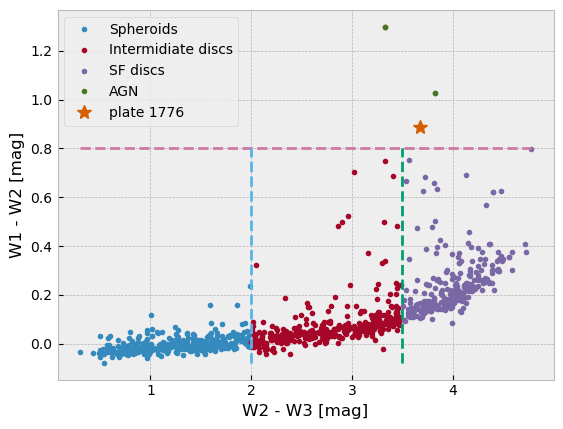

In [9]:
x_agn = np.linspace(np.min(data_wise['W2 mag'] - data_wise['W3 mag']), np.max(data_wise['W2 mag'] - data_wise['W3 mag']), 100)
y_agn = np.ones(100) * 0.8

y_morph =  np.linspace(np.min(data_wise['W1 mag'] - data_wise['W2 mag']), 0.8, 100)
x_sph = np.ones(100) * 2
x_disc = np.ones(100) * 3.5

spher = data_wise[data_wise['W2 mag'] - data_wise['W3 mag'] < 2]
int_disc_ = data_wise[data_wise['W2 mag'] - data_wise['W3 mag'] > 2]
int_disc = int_disc_[int_disc_['W2 mag'] - int_disc_['W3 mag'] < 3.5]
sf_disc = data_wise[data_wise['W2 mag'] - data_wise['W3 mag'] > 3.5]
agn = data_wise[data_wise['W1 mag'] - data_wise['W2 mag'] > 0.8]

#print(agn)
plate_1776_wise = data_wise.index[data_wise['plate'] == 1776].to_list() 

plt.plot(spher['W2 mag'] - spher['W3 mag'], spher['W1 mag'] - spher['W2 mag'],'o', markersize=3, label = 'Spheroids')
plt.plot(int_disc['W2 mag'] - int_disc['W3 mag'], int_disc['W1 mag'] - int_disc['W2 mag'],'o', markersize=3, label = 'Intermidiate discs')
plt.plot(sf_disc['W2 mag'] - sf_disc['W3 mag'], sf_disc['W1 mag'] - sf_disc['W2 mag'],'o', markersize=3, label = 'SF discs')
plt.plot(agn['W2 mag'] - agn['W3 mag'], agn['W1 mag'] - agn['W2 mag'], 'o', markersize=3, label = 'AGN')
plt.plot(agn['W2 mag'][617] - agn['W3 mag'][plate_1776_wise], agn['W1 mag'][plate_1776_wise] - agn['W2 mag'][plate_1776_wise], '*' , markersize=10, label = 'plate 1776')

plt.plot(x_agn, y_agn, '--')
plt.plot(x_sph, y_morph,'--')
plt.plot(x_disc, y_morph, '--')
#plt.ylim(np.min(y_data)- 0.1, np.max(y_data) + 0.1)
plt.xlabel(r'W2 - W3 [mag]')
plt.ylabel(r'W1 - W2 [mag]')
plt.legend()
plt.savefig('WISE_colors.png', dpi = 300)
plt.show()

#print(sf_disc)

The WISE colour diagram here uses a slightly different sample compared to the BPT diagram above. The conditions applied in the SDSS query are the same but after crossmatching with wise only 944 objects are returned compared to the 958 objects in the original sample. This difference is not dramatic, however, I believe it's important to note that in the WISE diagram, we find only 3 AGN objects. 

The first easy-to-spot difference between the BPT and WISE diagrams is the number of AGN objects. The BPT diagram has considerably more of them. For star-formation-dominated objects, the two methods return a similar number of entries - 259 star-forming discs from WISE and 245 star-formation-dominated objects from the BPT diagram so a possible answer to the reason for the AGN discrepancy would be that more spheroidal galaxies get grouped with the AGNs in a BPT diagram but to confirm this hypothesis I would need to investigate more. 

The random object I chose for this comparison is amrked with a star in both diagrams. In both diagrams Plate 1776 lies in the AGN region. In the BPT diagram it i very close to the emppirical separator line so it is in te mixed SF and AGN region. In the WISE color diagram it is also the closest to the separation line from all 3 AGN objects. Cross referencing with more detailed WISE color diagrams shows that this object is in the region where Seyferts, LRIGs and LINERs overlap (betwen 0.8 and 1 in W1-W2 and between 3.5 and 4 on W2-W3). 